Team Name: VVV


Team Member: Xinyu Wang

# Part One: Reading data and Checking basic information

In [1]:
# Importing libraries we need
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
print(os.listdir("../input"))

Using TensorFlow backend.


['train.csv', 'test.csv']


In [6]:
#Reading Data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [7]:
train.shape

(42000, 785)

In [8]:
test.shape

(28000, 784)

In [9]:
#Seperating our training set to variables and target
X_train = train.drop(labels = ["label"],axis = 1) 
Y_train = train["label"]

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

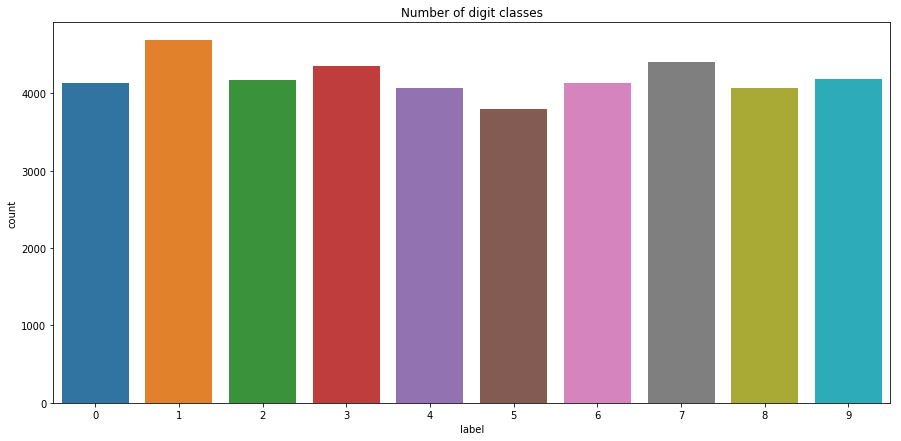

In [10]:
#Checking the number distribution of our dataset
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train)
plt.title("Number of digit classes")
Y_train.value_counts()
#From the graph below we can see different numbers distributed almost the same

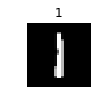

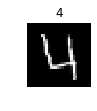

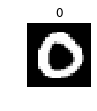

In [12]:
for i in range(2,5):
    plt.subplot(330 + (i+1))
    img = X_train.iloc[i].as_matrix()
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(train.iloc[i,0])
    plt.axis("off")
    plt.show()

In [13]:
# Checking data
X_train.isnull().any().describe()
#we can see that there is no missing value in our trainng set 

count       784
unique        1
top       False
freq        784
dtype: object

In [14]:
test.isnull().any().describe()
#We can see that there is no missing value in our test set

count       784
unique        1
top       False
freq        784
dtype: object

# Step Two: Data Preprocessing 

In [15]:
# Normalization
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [16]:
# Reshaping our trianing set and test set 
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
X_train.shape

(42000, 28, 28, 1)

In [17]:
# Label Encoding 
Y_train = to_categorical(Y_train, num_classes = 10)

In [18]:
# Splitting our training set into two parts -- training set and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


# Part Three: Using CNN to make prediction

In [19]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [20]:
# Defining Optimizer and Comiling the model
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [22]:
epochs = 15
batch_size = 200

In [23]:
#Data Augmentation -- to avoid overfitting 
datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False,
        featurewise_std_normalization=False, samplewise_std_normalization=False, 
        zca_whitening=False, zoom_range = 0.1, rotation_range=10, width_shift_range=0.1,
        horizontal_flip=False, vertical_flip=False, height_shift_range=0.1)

datagen.fit(X_train)

In [24]:
# Fitting our model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/15
189/189 [==============================] - 17s 89ms/step - loss: 0.9956 - acc: 0.6693 - val_loss: 0.2125 - val_acc: 0.9448
Epoch 2/15
189/189 [==============================] - 17s 88ms/step - loss: 0.4364 - acc: 0.8612 - val_loss: 0.1271 - val_acc: 0.9619
Epoch 3/15
189/189 [==============================] - 17s 88ms/step - loss: 0.3169 - acc: 0.8998 - val_loss: 0.1017 - val_acc: 0.9690
Epoch 4/15
189/189 [==============================] - 17s 88ms/step - loss: 0.2672 - acc: 0.9170 - val_loss: 0.0895 - val_acc: 0.9714
Epoch 5/15
189/189 [==============================] - 17s 88ms/step - loss: 0.2364 - acc: 0.9277 - val_loss: 0.0742 - val_acc: 0.9779
Epoch 6/15
189/189 [==============================] - 17s 87ms/step - loss: 0.2176 - acc: 0.9328 - val_loss: 0.0703 - val_acc: 0.9788
Epoch 7/15
189/189 [==============================] - 17s 89ms/step - loss: 0.1947 - acc: 0.9409 - val_loss: 0.0658 - val_acc: 0.9814
Epoch 8/15
189/189 [==============================] - 17s 89ms

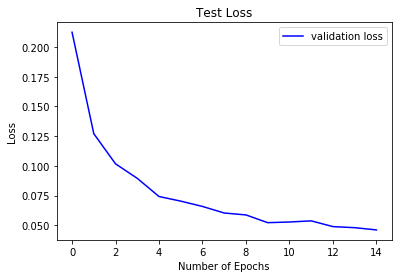

In [25]:
# Plotting the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

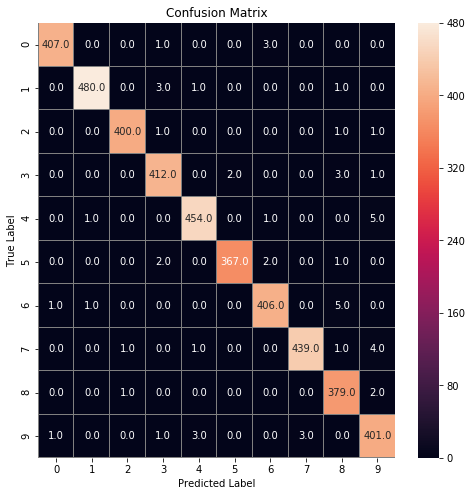

In [26]:
# Let's take a look at the confusion matrix
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
# Seeing the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Plotting the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

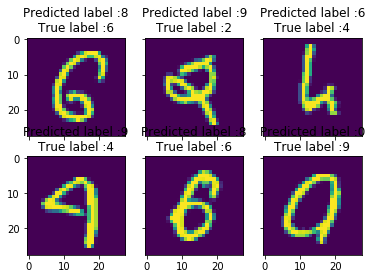

In [29]:
# Displaying some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

sorted_dela_errors = np.argsort(delta_pred_true_errors)
most_important_errors = sorted_dela_errors[-6:]
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

From the graphs above, we acan see that some of the errors may be caused by human writing, for example, the third picture looks very close to 6, even when people try to figure its actual value

# Part Four. Saving our results 

In [30]:
results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [31]:
submission = pd.concat([pd.Series(range(1,28001), name = "ImageId"), results], axis = 1)
submission.to_csv("submisisson_xinyuwang.csv",index = False)